# YOLO Training Analysis

Comprehensive analysis of YOLO training results for **OBB** and **CLS** models.

## Features
- Training/Validation loss analysis
- Performance metrics visualization
- Overfitting detection
- Learning curve analysis
- Best epoch identification

## 1) Imports

In [1]:
from config_loader import CONFIG

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from yolo_training_analyzer import (
    analyze,
    ObbAnalyzer,
    ClsAnalyzer,
    TrainingVisualizer,
    create_comparison_plot,
)

## 2) Configuration

In [3]:
# ============================================================
# === CONFIGURATION - EDIT THESE VALUES ===
# ============================================================

# Path to training run directory (contains results.csv, weights/, args.yaml)
RUN_DIR = Path(r"C:\Users\floot\Florian's Laptop\ESILV\CV and Deep Learning\ESILV_A5_Computer_Vision\trainning\training_runs")

OBB_RUN_DIR = RUN_DIR / "obb_runs"
CLS_RUN_DIR = RUN_DIR / "cls_runs"

# Choose which to analyze
ANALYZE_OBB = True
ANALYZE_CLS = True

---

# Part 1: OBB Model Analysis

In [4]:
if ANALYZE_OBB and OBB_RUN_DIR.exists():
    print(f"Loading OBB training results from: {OBB_RUN_DIR}")
    obb_analyzer = ObbAnalyzer(OBB_RUN_DIR)
    print(f"✓ Loaded {obb_analyzer.total_epochs} epochs")
else:
    print("Skipping OBB analysis (directory not found or disabled)")
    obb_analyzer = None

Loading OBB training results from: C:\Users\floot\Florian's Laptop\ESILV\CV and Deep Learning\ESILV_A5_Computer_Vision\trainning\training_runs\obb_runs
✓ Loaded 150 epochs


### 1.1) Training Summary

In [5]:
if obb_analyzer:
    summary = obb_analyzer.get_summary()
    
    print("="*60)
    print("OBB TRAINING SUMMARY")
    print("="*60)
    print(summary)

OBB TRAINING SUMMARY
Task: obb
Model: yolo11n-obb.pt
Total epochs: 150
Best epoch: 72
Best mAP50: 0.9949

Final metrics:
  mAP50: 0.9929
  mAP50-95: 0.9782
  Precision: 0.9822
  Recall: 0.9835


### 1.2) Dashboard

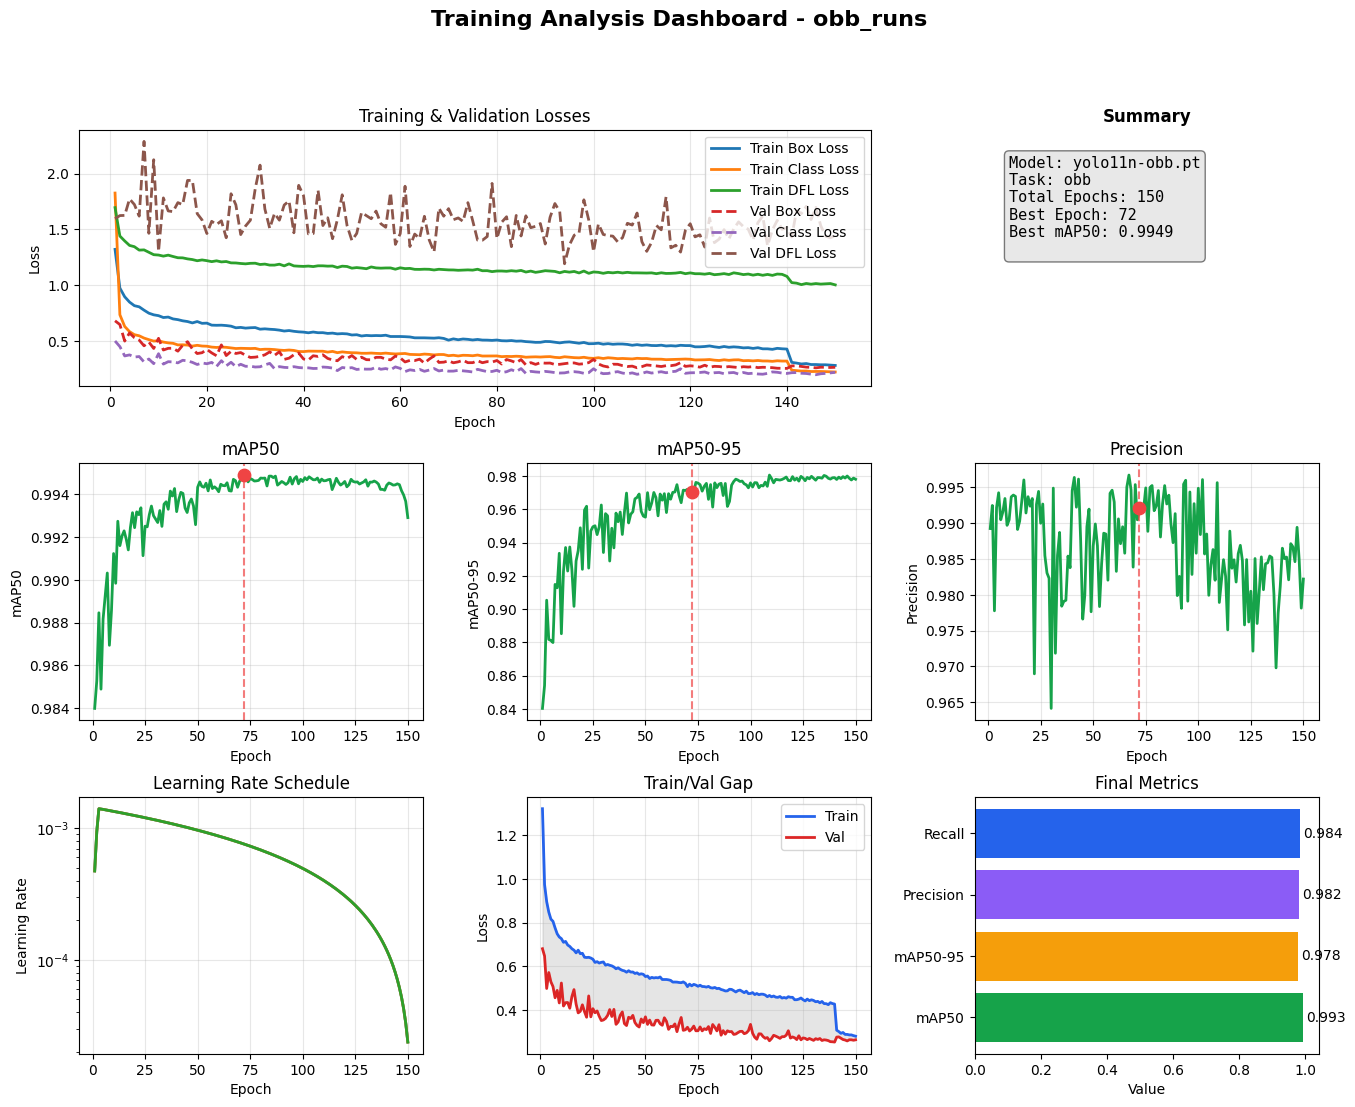

In [6]:
if obb_analyzer:
    viz = TrainingVisualizer(obb_analyzer)
    fig = viz.plot_dashboard(figsize=(16, 12))
    plt.show()

### 1.3) Loss Analysis

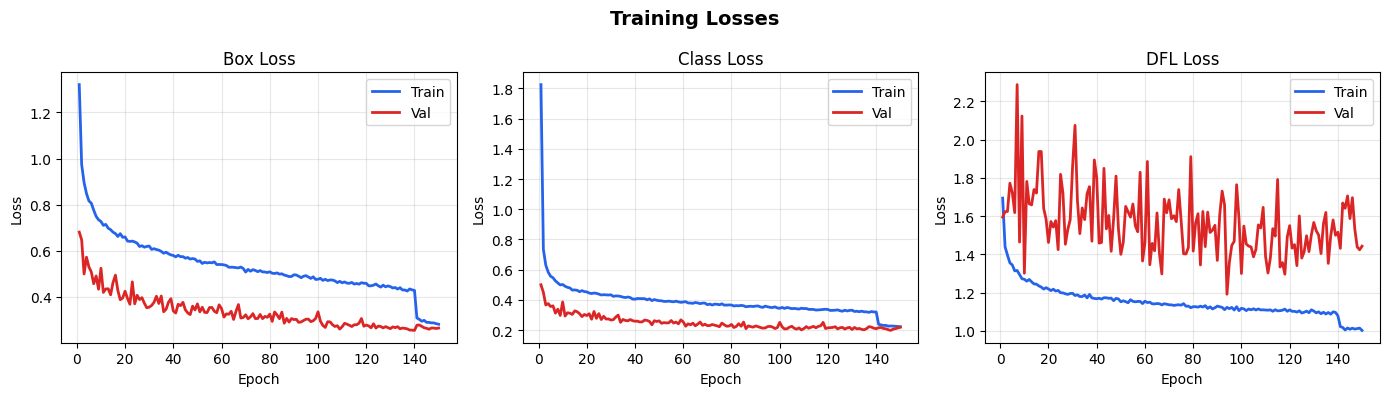


Loss Analysis:
----------------------------------------

TRAIN:
  Box Loss:
    initial: 1.3205
    final: 0.2811
    min: 0.2811
    reduction: 1.0394
  Class Loss:
    initial: 1.8249
    final: 0.2226
    min: 0.2226
    reduction: 1.6024
  DFL Loss:
    initial: 1.6943
    final: 1.0025
    min: 1.0025
    reduction: 0.6918

VAL:
  Box Loss:
    initial: 0.6807
    final: 0.2645
    min: 0.2542
    min_epoch: 139.0000
  Class Loss:
    initial: 0.5001
    final: 0.2190
    min: 0.1979
    min_epoch: 145.0000
  DFL Loss:
    initial: 1.5952
    final: 1.4430
    min: 1.1917
    min_epoch: 93.0000


In [7]:
if obb_analyzer:
    fig = viz.plot_losses(figsize=(14, 4))
    plt.show()
    
    loss_analysis = obb_analyzer.get_loss_analysis()
    
    print("\nLoss Analysis:")
    print("-"*40)
    for category, losses in loss_analysis.items():
        print(f"\n{category.upper()}:")
        for name, stats in losses.items():
            print(f"  {name}:")
            for stat, value in stats.items():
                print(f"    {stat}: {value:.4f}")

### 1.4) mAP Analysis

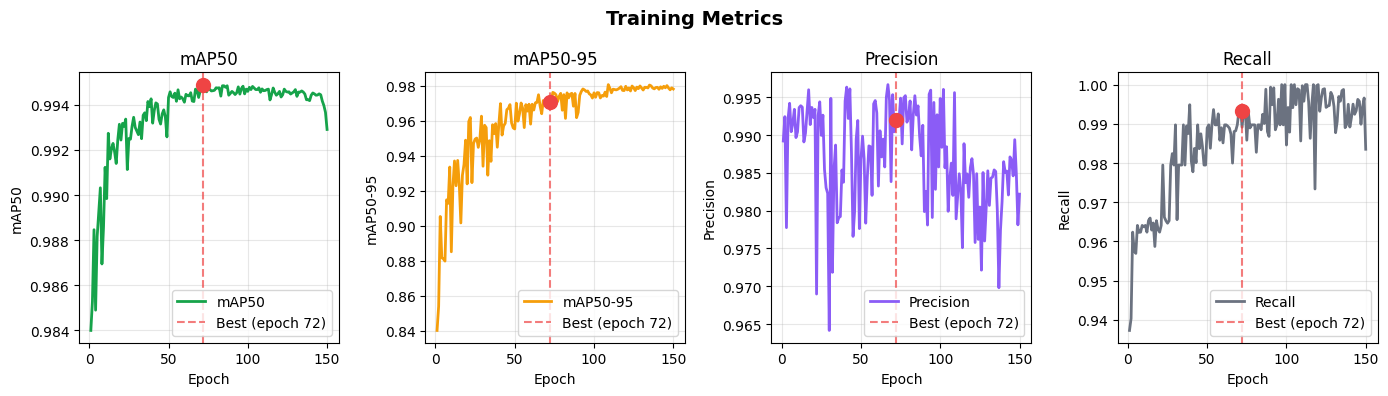


mAP Analysis:
----------------------------------------

mAP50:
  best: 0.9949
  best_epoch: 72
  final: 0.9929
  mean_last_10: 0.9942
  std_last_10: 0.0005

mAP50-95:
  best: 0.9807
  best_epoch: 108
  final: 0.9782
  mean_last_10: 0.9789


In [8]:
if obb_analyzer:
    fig = viz.plot_metrics(figsize=(14, 4))
    plt.show()
    
    map_analysis = obb_analyzer.get_map_analysis()
    
    print("\nmAP Analysis:")
    print("-"*40)
    for metric, stats in map_analysis.items():
        if isinstance(stats, dict):
            print(f"\n{metric}:")
            for stat, value in stats.items():
                if isinstance(value, float):
                    print(f"  {stat}: {value:.4f}")
                else:
                    print(f"  {stat}: {value}")

### 1.5) Precision/Recall Analysis

In [9]:
if obb_analyzer:
    pr_analysis = obb_analyzer.get_precision_recall_analysis()
    
    print("Precision/Recall Analysis:")
    print("-"*40)
    
    if "error" not in pr_analysis:
        print(f"\nPrecision:")
        print(f"  Best: {pr_analysis['precision']['best']:.4f}")
        print(f"  Final: {pr_analysis['precision']['final']:.4f}")
        
        print(f"\nRecall:")
        print(f"  Best: {pr_analysis['recall']['best']:.4f}")
        print(f"  Final: {pr_analysis['recall']['final']:.4f}")
        
        print(f"\nF1 Score:")
        print(f"  Best: {pr_analysis['f1']['best']:.4f} (epoch {pr_analysis['f1']['best_epoch']})")
        print(f"  Final: {pr_analysis['f1']['final']:.4f}")
        
        print(f"\nBalance: {pr_analysis['balance']}")
    else:
        print(pr_analysis["error"])

Precision/Recall Analysis:
----------------------------------------

Precision:
  Best: 0.9967
  Final: 0.9822

Recall:
  Best: 1.0000
  Final: 0.9835

F1 Score:
  Best: 0.9943 (epoch 86)
  Final: 0.9829

Balance: good


### 1.6) Overfitting Check

In [10]:
if obb_analyzer:
    overfit = obb_analyzer.get_overfitting_indicator()
    
    print("Overfitting Analysis:")
    print("-"*40)
    print(f"Status: {overfit['status'].upper()}")
    print(f"Message: {overfit['message']}")
    
    if "gap_growth" in overfit:
        print(f"Gap Growth: {overfit['gap_growth']:.4f}")

Overfitting Analysis:
----------------------------------------
Status: WARNING
Message: Growing gap between train and val loss
Gap Growth: 0.6232


### 1.7) Learning Rate Schedule

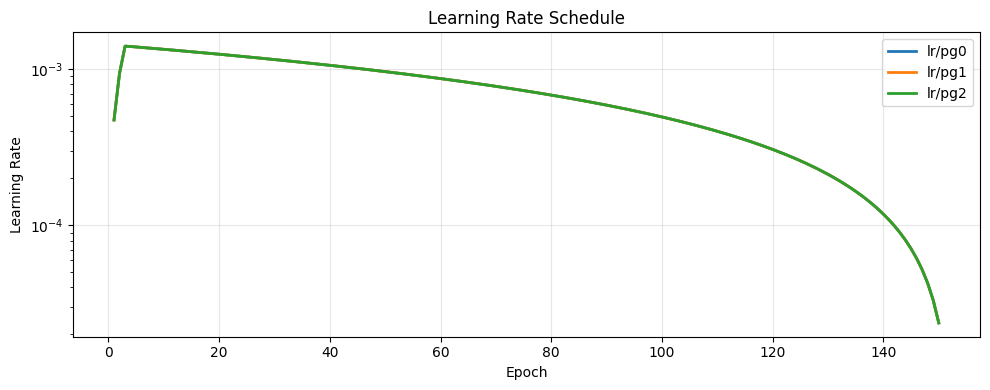

In [11]:
if obb_analyzer:
    try:
        fig = viz.plot_learning_rate()
        plt.show()
    except ValueError as e:
        print(f"Learning rate data not available: {e}")

### 1.8) Convergence Analysis

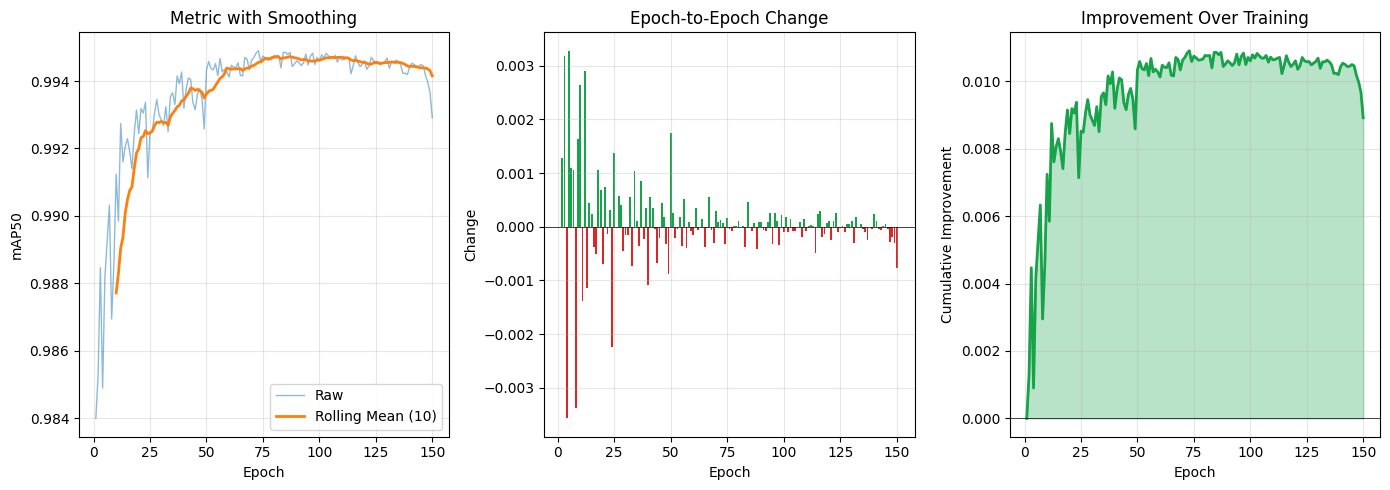


Convergence Status:
  Best epoch: 72
  Epochs since best: 78
  Has converged: Yes


In [12]:
if obb_analyzer:
    fig = viz.plot_convergence_analysis()
    plt.show()
    
    converged = obb_analyzer.has_converged(patience=10)
    best_epoch, _, best_value = obb_analyzer.get_best_epoch()
    
    print(f"\nConvergence Status:")
    print(f"  Best epoch: {best_epoch}")
    print(f"  Epochs since best: {obb_analyzer.total_epochs - best_epoch}")
    print(f"  Has converged: {'Yes' if converged else 'No'}")

---

# Part 2: CLS Model Analysis

In [13]:
if ANALYZE_CLS and CLS_RUN_DIR.exists():
    print(f"Loading CLS training results from: {CLS_RUN_DIR}")
    cls_analyzer = ClsAnalyzer(CLS_RUN_DIR)
    print(f"✓ Loaded {cls_analyzer.total_epochs} epochs")
else:
    print("Skipping CLS analysis (directory not found or disabled)")
    cls_analyzer = None

Loading CLS training results from: C:\Users\floot\Florian's Laptop\ESILV\CV and Deep Learning\ESILV_A5_Computer_Vision\trainning\training_runs\cls_runs
✓ Loaded 24 epochs


### 2.1) Training Summary

In [14]:
if cls_analyzer:
    summary = cls_analyzer.get_summary()
    
    print("="*60)
    print("CLS TRAINING SUMMARY")
    print("="*60)
    print(summary)

CLS TRAINING SUMMARY
Task: classify
Model: yolo11s-cls.pt
Total epochs: 24
Best epoch: 3
Best Top-1 Accuracy: 1.0000

Final metrics:
  Top-1 Accuracy: 1.0000
  Top-5 Accuracy: 1.0000


### 2.2) Dashboard

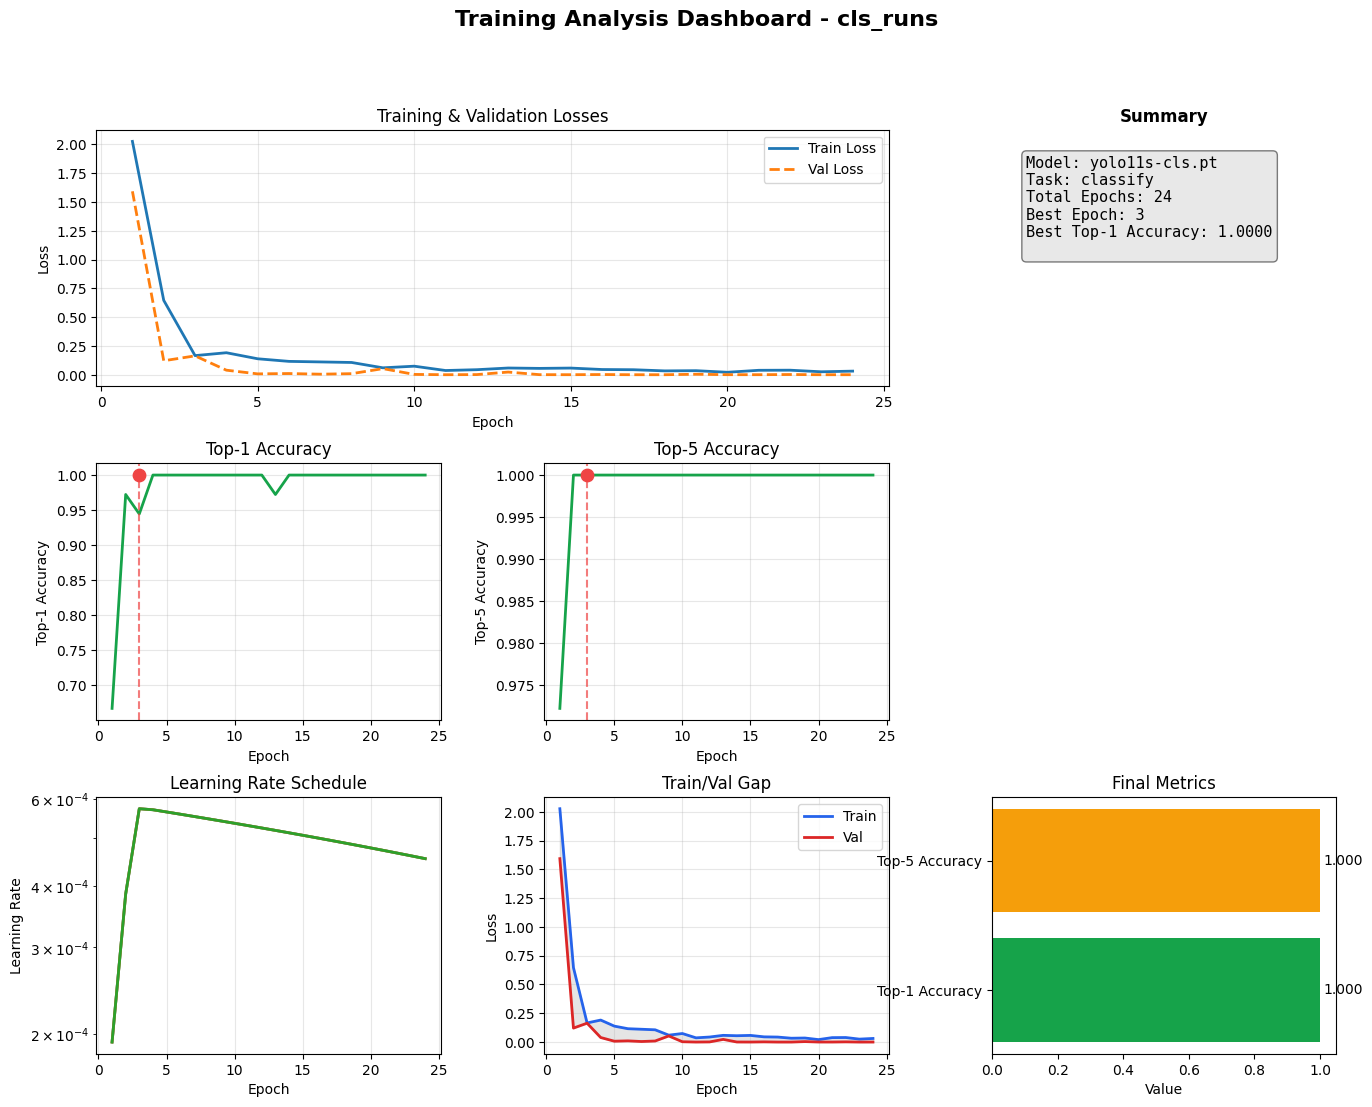

In [15]:
if cls_analyzer:
    viz_cls = TrainingVisualizer(cls_analyzer)
    fig = viz_cls.plot_dashboard(figsize=(16, 12))
    plt.show()

### 2.3) Loss Analysis

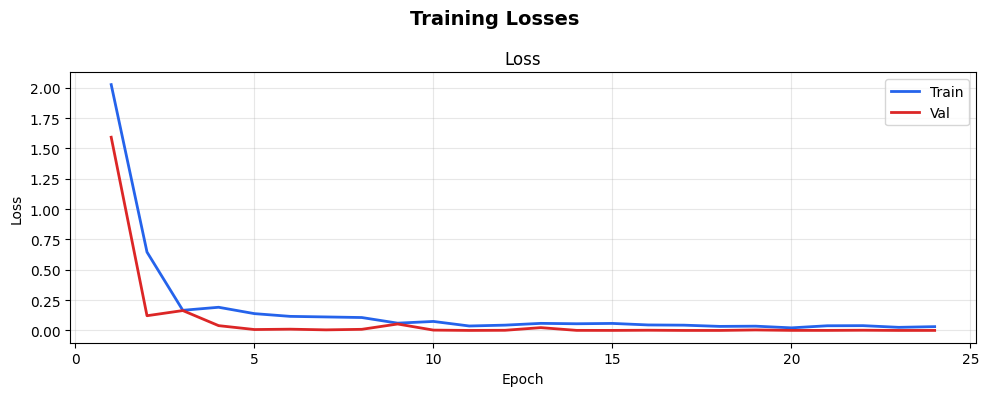


Loss Analysis:
----------------------------------------

Training Loss:
  initial: 2.0263
  final: 0.0313
  min: 0.0214
  reduction: 1.9950
  reduction_pct: 98.4548

Validation Loss:
  initial: 1.5928
  final: 0.0002
  min: 0.0001
  min_epoch: 22

Generalization:
  Gap: -0.0311
  Gap Ratio: -99.30%
  Status: EXCELLENT


In [16]:
if cls_analyzer:
    fig = viz_cls.plot_losses(figsize=(10, 4))
    plt.show()
    
    loss_analysis = cls_analyzer.get_loss_analysis()
    
    print("\nLoss Analysis:")
    print("-"*40)
    
    if "train" in loss_analysis:
        print("\nTraining Loss:")
        for stat, value in loss_analysis["train"].items():
            if isinstance(value, float):
                print(f"  {stat}: {value:.4f}")
    
    if "val" in loss_analysis:
        print("\nValidation Loss:")
        for stat, value in loss_analysis["val"].items():
            if isinstance(value, float):
                print(f"  {stat}: {value:.4f}")
            else:
                print(f"  {stat}: {value}")
    
    if "generalization" in loss_analysis:
        print("\nGeneralization:")
        gen = loss_analysis["generalization"]
        print(f"  Gap: {gen['gap']:.4f}")
        print(f"  Gap Ratio: {gen['gap_ratio']:.2%}")
        print(f"  Status: {gen['status'].upper()}")

### 2.4) Accuracy Analysis

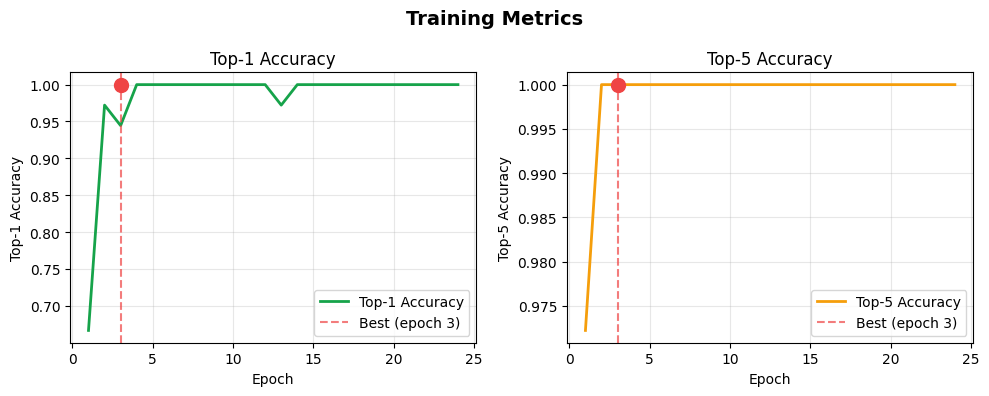


Accuracy Analysis:
----------------------------------------

Top-1 Accuracy:
  best: 1.0000
  best_epoch: 3
  final: 1.0000
  mean_last_10: 1.0000
  std_last_10: 0.0000
  improvement: 0.3333

Top-5 Accuracy:
  best: 1.0000
  final: 1.0000

Top-1/Top-5 Gap: 0.0000
Interpretation: Low gap - confident predictions


In [17]:
if cls_analyzer:
    fig = viz_cls.plot_metrics(figsize=(10, 4))
    plt.show()
    
    acc_analysis = cls_analyzer.get_accuracy_analysis()
    
    print("\nAccuracy Analysis:")
    print("-"*40)
    
    if "top1" in acc_analysis:
        print("\nTop-1 Accuracy:")
        for stat, value in acc_analysis["top1"].items():
            if isinstance(value, float):
                print(f"  {stat}: {value:.4f}")
            else:
                print(f"  {stat}: {value}")
    
    if "top5" in acc_analysis:
        print("\nTop-5 Accuracy:")
        for stat, value in acc_analysis["top5"].items():
            if isinstance(value, float):
                print(f"  {stat}: {value:.4f}")
    
    if "gap_interpretation" in acc_analysis:
        print(f"\nTop-1/Top-5 Gap: {acc_analysis['top1_top5_gap']:.4f}")
        print(f"Interpretation: {acc_analysis['gap_interpretation']}")

### 2.5) Learning Curve Analysis

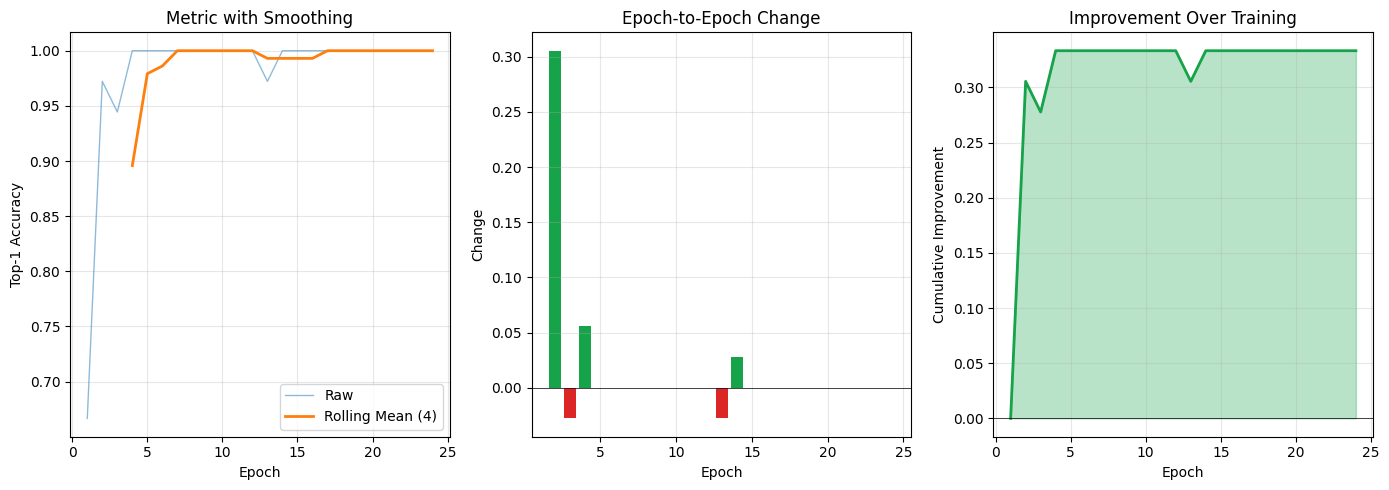


Learning Curve Analysis:
----------------------------------------

Curve Type: IRREGULAR
Recommendation: Unstable training, consider adjusting learning rate

Quarter Means:
  q1_mean: 0.9306
  q2_mean: 1.0000
  q3_mean: 0.9954
  q4_mean: 1.0000

Gains:
  early: +0.0694
  mid: -0.0046
  late: +0.0046


In [18]:
if cls_analyzer:
    fig = viz_cls.plot_convergence_analysis()
    plt.show()
    
    curve_analysis = cls_analyzer.get_learning_curve_analysis()
    
    print("\nLearning Curve Analysis:")
    print("-"*40)
    
    if "error" not in curve_analysis:
        print(f"\nCurve Type: {curve_analysis['curve_type'].upper()}")
        print(f"Recommendation: {curve_analysis['recommendation']}")
        
        print("\nQuarter Means:")
        for q, val in curve_analysis["quarters"].items():
            print(f"  {q}: {val:.4f}")
        
        print("\nGains:")
        for phase, val in curve_analysis["gains"].items():
            print(f"  {phase}: {val:+.4f}")
    else:
        print(curve_analysis["error"])

### 2.6) Optimal Epochs Estimation

In [19]:
if cls_analyzer:
    epoch_analysis = cls_analyzer.estimate_optimal_epochs()
    
    print("Optimal Epochs Analysis:")
    print("-"*40)
    
    if "error" not in epoch_analysis:
        print(f"Best Epoch: {epoch_analysis['best_epoch']}")
        print(f"Best Accuracy: {epoch_analysis['best_accuracy']:.4f}")
        print(f"\n95% of best at epoch: {epoch_analysis['epoch_95_percent']}")
        print(f"99% of best at epoch: {epoch_analysis['epoch_99_percent']}")
        print(f"\n{epoch_analysis['efficiency_recommendation']}")
        print(f"\nEpochs after best: {epoch_analysis['epochs_after_best']}")

Optimal Epochs Analysis:
----------------------------------------
Best Epoch: 3
Best Accuracy: 1.0000

95% of best at epoch: 1
99% of best at epoch: 3

For 95% of best performance, 1 epochs suffice. Best performance at epoch 3.

Epochs after best: 21


### 2.7) Overfitting Check

In [20]:
if cls_analyzer:
    overfit = cls_analyzer.get_overfitting_indicator()
    
    print("Overfitting Analysis:")
    print("-"*40)
    print(f"Status: {overfit['status'].upper()}")
    print(f"Message: {overfit['message']}")

Overfitting Analysis:
----------------------------------------
Status: WARNING
Message: Growing gap between train and val loss


---

# Part 3: Export Results

In [22]:
# Export OBB dashboard
if obb_analyzer:
    viz = TrainingVisualizer(obb_analyzer)
    fig = viz.plot_dashboard(save_path=OBB_RUN_DIR / "analysis_dashboard.png")
    plt.close(fig)

# Export CLS dashboard
if cls_analyzer:
    viz_cls = TrainingVisualizer(cls_analyzer)
    fig = viz_cls.plot_dashboard(save_path=CLS_RUN_DIR / "analysis_dashboard.png")
    plt.close(fig)

print("\n✅ Dashboards exported!")

Dashboard saved to: C:\Users\floot\Florian's Laptop\ESILV\CV and Deep Learning\ESILV_A5_Computer_Vision\trainning\training_runs\obb_runs\analysis_dashboard.png
Dashboard saved to: C:\Users\floot\Florian's Laptop\ESILV\CV and Deep Learning\ESILV_A5_Computer_Vision\trainning\training_runs\cls_runs\analysis_dashboard.png

✅ Dashboards exported!
